# PS 137L: Week 3 Section 
## **Practice:** Defining Democracy and Data Visualization

This week, we'll be working with the Freedom House data that we have been 


First, lets load up the dataset that we will be working with here. We will be using the raw country-year dataset from Freedom House that goes all the way back to 2013. Unfortunately, pre-2013 Freedom House uses a different scale for their rating system so comparisons pre/post 2013 are a bit tricky. In the dataset we are using however, every row represents a country in a given year, dating back to 2013. Let's take a look... 

In [3]:
# run this cell!
library(tidyverse)
data <- read.csv("./data.csv")
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,Country.Territory,Region,C.T,Edition,Status,PR.rating,CL.rating,A1,A2,A3,⋯,F3,F4,F,G1,G2,G3,G4,G,CL,Total
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Abkhazia,Eurasia,t,2024,PF,5,5,2,2,1,⋯,1,1,4,1,1,2,1,5,22,39
2,Afghanistan,Asia,c,2024,NF,7,7,0,0,0,⋯,0,0,0,0,1,0,1,2,5,6
3,Albania,Europe,c,2024,PF,3,3,3,3,3,⋯,2,3,10,3,2,2,2,9,40,68
4,Algeria,Africa,c,2024,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,22,32
5,Andorra,Europe,c,2024,F,1,1,4,4,4,⋯,4,3,15,4,4,3,4,15,55,93
6,Angola,Africa,c,2024,NF,6,5,0,2,1,⋯,1,2,5,1,1,1,0,3,18,28


Typically, when working with a dataset like this, the data provider will also provide a ``codebook,'' which is a guide that lets you understand what each column name is. I've taken their codebook and provided a general key below:

In [4]:
country_name <- "[FILL]" #fill in your country here
filtered_data <- data[data$Country.Territory == country_name, ] # filter the data to only rows that coorespond to your country
head(filtered_data)

,Country.Territory,Region,C.T,Edition,Status,PR.rating,CL.rating,A1,A2,A3,⋯,F3,F4,F,G1,G2,G3,G4,G,CL,Total
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,Algeria,Africa,c,2024,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,22,32
214,Algeria,Africa,c,2023,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,22,32
424,Algeria,Africa,c,2022,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,22,32
634,Algeria,Africa,c,2021,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,22,32
844,Algeria,Africa,c,2020,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,24,34
1054,Algeria,Africa,c,2019,NF,6,5,1,1,1,⋯,2,2,6,2,2,2,1,7,24,34


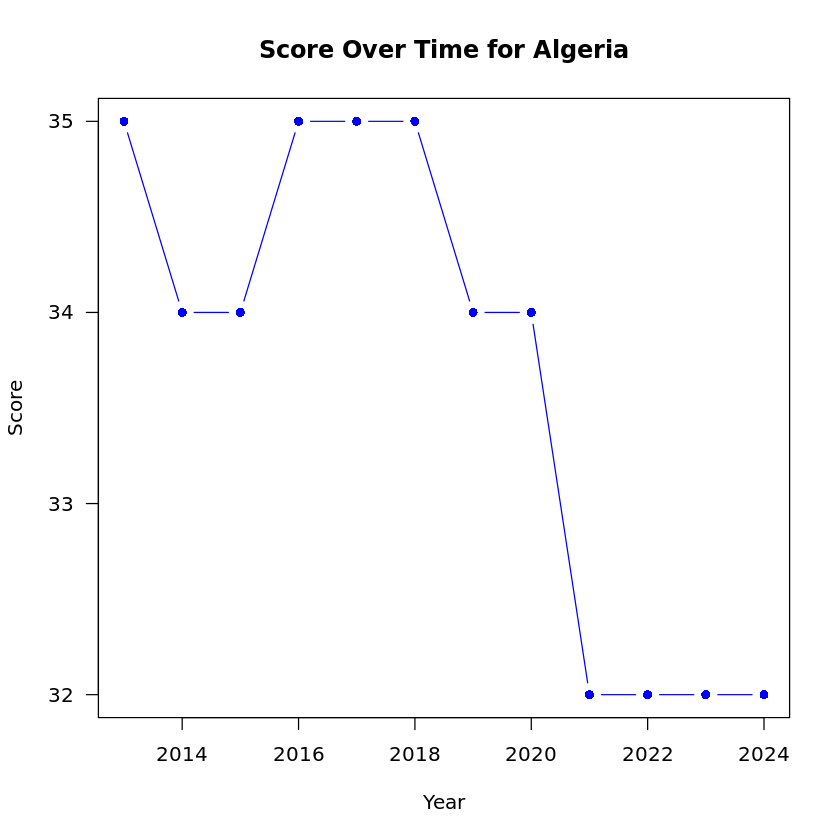

In [5]:
# construct a plot of your country's total score from 2013 - 2024
plot(filtered_data$[FILL], filtered_data$[FILL], type="b", 
     main=paste("FH Score Over Time for", country_name), 
     xlab="Year", ylab="Score", 
     pch=16, col="blue", lty=1, 
     yaxt="n")

#this line just adjusts the y-axis to make sure it uses only integers 
axis(2, at=round(seq(min(filtered_data$Total), max(filtered_data$Total), by=1)), las=1)


Describe the patterns you see in your country's last 10 year? Does it go up/down slowly? Is it stable? Does the score drastically change in a given year? 

[YOUR ANSWER HERE]

Now, let's make a plot that lets us decompose the "Total" score into its 2 compontent parts-- civil liberty and political rights. Which columns in the dataset correspond to the two components?

In [36]:
# plot political rights
plot(filtered_data$Edition, filtered_data$[FILL], type="b", 
     main=paste("FH Score Breakdown Over Time for", country_name), 
     xlab="Year", ylab="Score", 
     pch=16, col="blue", lty=1, 
     yaxt="n")
par(new=TRUE)
#plot civil liberties
plot(filtered_data$Edition, filtered_data$CL, type="b", 
     xlab="", ylab="", xaxt="n", yaxt="n", 
     pch=17, col="red", lty=1)

# Add legend
legend("topright", legend=c("PR: Political Rights", "CL: Civil Liberties"), 
       col=c("blue", "red"), pch=c(16, 17), lty=c(1, 2))
# Add y-axis
axis(2, at=seq(min(filtered_data$PR, filtered_data$CL), max(filtered_data$PR, filtered_data$CL), by=1)) 


ERROR: Error in parse(text = input): <text>:2:43: unexpected '['
1: # plot political rights
2: plot(filtered_data$Edition, filtered_data$[
                                             ^


Does this plot reveal any interesting patterns?

[YOUR ANSWER HERE]

Now, lets see what specific things are driving changes in **one** of the seven subcategories (A, B, C...,G). Pick a category. Lets plot the scores across every year for each individual item in a subcategory, as well as the total score for that subcategory overlayed to better visualize what is driving changes in these subcategory scores

In [17]:
 names(filtered_data) #This line of code lists the names of every column. It will let you see how many items are in each subcategory.

[1] "Country.Territory" "Region"            "C.T"              
 [4] "Edition"           "Status"            "PR.rating"        
 [7] "CL.rating"         "A1"                "A2"               
[10] "A3"                "A"                 "B1"               
[13] "B2"                "B3"                "B4"               
[16] "B"                 "C1"                "C2"               
[19] "C3"                "C"                 "Add.Q"            
[22] "Add.A"             "PR"                "D1"               
[25] "D2"                "D3"                "D4"               
[28] "D"                 "E1"                "E2"               
[31] "E3"                "E"                 "F1"               
[34] "F2"                "F3"                "F4"               
[37] "F"                 "G1"                "G2"               
[40] "G3"                "G4"                "G"                
[43] "CL"                "Total"

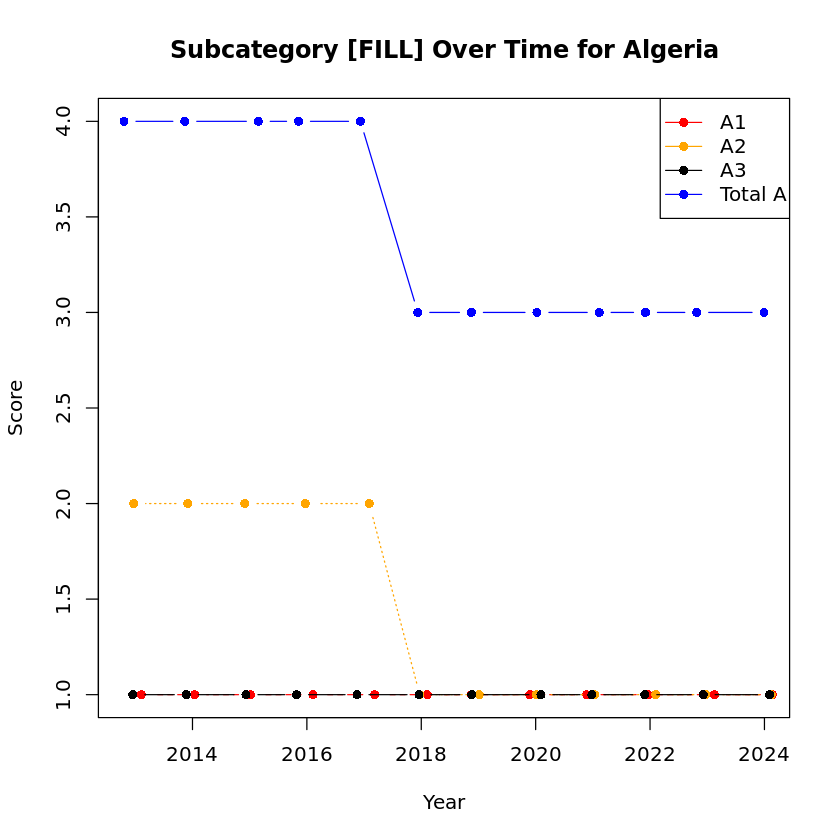

In [35]:
# Plot your subcategory items and the subcategory total with jittered x-axis. Jittering slightly shifts data points along the x-axis to 
# reduce overlap, making it easier to distinguish individual observations in crowded plots.

# first, plot the subcategory total (using A as example-- you must pick other subcategory!)
plot(jitter(filtered_data$Edition, amount=0.2), filtered_data$A, type="b", col="blue", 
     pch=16, lty=1, lwd=1,
     main=paste("Subcategory [FILL] Over Time for", country_name),
     xlab="Year", ylab="Score",
     ylim=range(filtered_data[, c("A1", "A2", "A3", "A")], na.rm=TRUE))

# Then, add the subcategory components to the plot 
points(jitter(filtered_data$Edition, amount=0.2), filtered_data$A1, type="b", col="red", 
       pch=16, lty=2)
points(jitter(filtered_data$Edition, amount=0.2), filtered_data$A2, type="b", col="orange", 
       pch=16, lty=3)
points(jitter(filtered_data$Edition, amount=0.2), filtered_data$A3, type="b", col="black", 
       pch=16, lty=1 )

# Add legend
legend("topright", legend=c("A1", "A2", "A3", "Total A"), 
       col=c("red", "orange", "black", "blue"), 
       pch=c(16, 16, 16, 16), lty=c(1, 1, 1, 1), lwd=c(1, 1, 1, 1))


What does this plot reveal? (Remember, the Total variable is a composite measure of all of the items in that subcategory) Do you find this to be a useful visualization? Try and describe  another visualizations you might want to do to get a better sense of how democracy has changed in your case country.

[YOUR ANSWER]

### Woooooo thats itttttt 